<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/K-Means%20Clustering/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

* K-Means Clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

* Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
# Mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Mall_Customers.csv', sep=',')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3,4]].values

## Using elbow method to find the optimal number of clusters

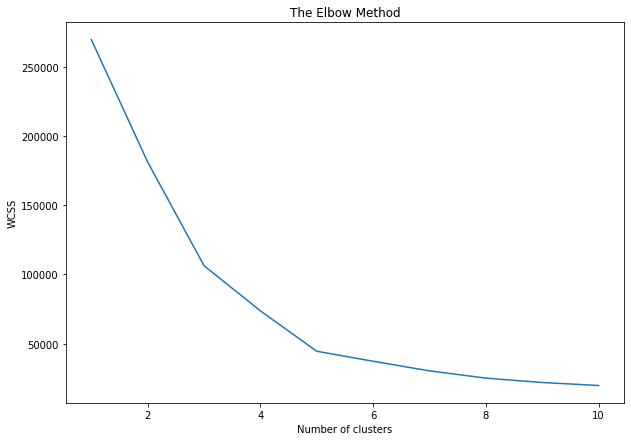

In [6]:
from sklearn.cluster import KMeans

wcss = list()

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()  

## Training the K-Means model on the dataset

In [10]:
  kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
  y_kmeans = kmeans.fit_predict(X)

In [11]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualizing the clusters

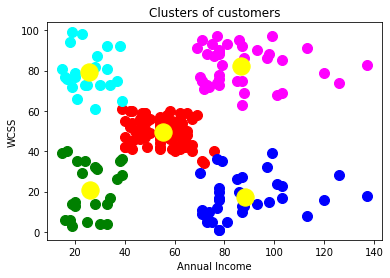

In [12]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=100, c='magenta', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s=300, c='yellow', label='Centroids') # Centroid
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel('WCSS')
plt.show()             